In [1]:
import sqlite3
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import string

#NLTK
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [2]:
neg = pd.read_csv('neg_review.csv')
neg

,Review
0,I want prices. Nothing price. Waste time!
1,Waste application! Never
2,Would work Android tablet! Could enter scores ...
3,Why can't delete wish? Factory waste space I W...
4,Not useful way learn language
...,...
6235,"This game challenging, give opportunity earn t..."
6236,I like game bc dude perfect related stupid gam...
6237,nice game I confused game
6238,1 star can't move photos timeline post album. ...


In [3]:
#with pd.ExcelWriter('berita kompas.xlsx') as writer:  
 #       df.to_excel(writer, sheet_name='berita kompas')

In [4]:
def low(text):
        return text.lower()

def removenumber(text):
        return  re.sub(r"\d+", "", text)

def removepunct(text):
        return text.translate(str.maketrans("","",string.punctuation))

def removewhitespace(text):
        return text.strip()
    
def remove_url(text):
        return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b' , '', text, flags=re.MULTILINE)

def tokenizekalimat(text):
        return sent_tokenize(text)
    
def tokenizekata(text):
        return word_tokenize(text)
    
def remove_special_char(text):
        text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
        text = text.encode('ascii', 'replace').decode('ascii')
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()) 
        
def remove_urlless(text):
        return text.replace("http://", " ").replace("https://", " ")             
    
def stopwordss(kalimat):
    list_baru = ['would','get','im','many','also','even','time','u','like','google','play','great','good','make','want','go','thing']
    list_stopwords = stopwords.words('english') #list
    list_stopwords.append(list_baru) #list
    for i in list_baru:
         list_stopwords.append(i)
    return ' '.join([w for w in kalimat if not w in list_stopwords])
    
def stemming(text):
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        return stemmer.stem(text)


In [5]:
text = neg['Review'].apply(low)
text = text.apply(remove_url)
text = text.apply(removenumber)
text = text.apply(removepunct)
text = text.apply(remove_special_char)
text = text.apply(remove_urlless)
text = text.apply(tokenizekata)
text1 = text.apply(stopwordss)

text1

0                              prices nothing price waste
1                                 waste application never
2       work android tablet could enter scores per hol...
3              cant delete wish factory waste space phone
4                               useful way learn language
                              ...                        
6235    game challenging give opportunity earn game pl...
6236    game bc dude perfect related stupid game pay w...
6237                              nice game confused game
6238    star cant move photos timeline post album hard...
6239    spinning wheel rigged dont people rank dont ra...
Name: Review, Length: 6240, dtype: object

In [6]:
type(text1)

pandas.core.series.Series

In [7]:
df2 = DataFrame(text1)
df2 #dataframe bersih


,Review
0,prices nothing price waste
1,waste application never
2,work android tablet could enter scores per hol...
3,cant delete wish factory waste space phone
4,useful way learn language
...,...
6235,game challenging give opportunity earn game pl...
6236,game bc dude perfect related stupid game pay w...
6237,nice game confused game
6238,star cant move photos timeline post album hard...


In [8]:
text1 = ' '.join(text1)

In [9]:
text1

'prices nothing price waste waste application never work android tablet could enter scores per hole show give yardage hole graphics dont waste money app cant delete wish factory waste space phone useful way learn language junk useful space waster useful need default share pictures useful waste people singing english garbage dont waste refuses work tried multiple times third class nd waste going well cant stand adds block menu icons profilechats furrs exstrait needs addressed makes harder waste needs internet n ask calls information faltu plz waste ur dont waste money become vip tons scam rubbish cant chat girls without paying premium waste awesommmmmmmmmm app jst dwnld nd njy nt trapped anywhr pakka waste waste phone memory map visible air traffic showing ever adds waste ive never downloaded adds never canada maybe guys state front waste garbage waste third grade waste timepaid girls waste waste buffer wain minutes another screen theres point playing keeps happening waste garbage stry 

### Distribusi Frekuensi Kata

In [10]:
import itertools
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [11]:
kata = word_tokenize(text1)
kata

['prices',
 'nothing',
 'price',
 'waste',
 'waste',
 'application',
 'never',
 'work',
 'android',
 'tablet',
 'could',
 'enter',
 'scores',
 'per',
 'hole',
 'show',
 'give',
 'yardage',
 'hole',
 'graphics',
 'dont',
 'waste',
 'money',
 'app',
 'cant',
 'delete',
 'wish',
 'factory',
 'waste',
 'space',
 'phone',
 'useful',
 'way',
 'learn',
 'language',
 'junk',
 'useful',
 'space',
 'waster',
 'useful',
 'need',
 'default',
 'share',
 'pictures',
 'useful',
 'waste',
 'people',
 'singing',
 'english',
 'garbage',
 'dont',
 'waste',
 'refuses',
 'work',
 'tried',
 'multiple',
 'times',
 'third',
 'class',
 'nd',
 'waste',
 'going',
 'well',
 'cant',
 'stand',
 'adds',
 'block',
 'menu',
 'icons',
 'profilechats',
 'furrs',
 'exstrait',
 'needs',
 'addressed',
 'makes',
 'harder',
 'waste',
 'needs',
 'internet',
 'n',
 'ask',
 'calls',
 'information',
 'faltu',
 'plz',
 'waste',
 'ur',
 'dont',
 'waste',
 'money',
 'become',
 'vip',
 'tons',
 'scam',
 'rubbish',
 'cant',
 'chat',


In [12]:
list_baru = ['ive','way','would','get','im','many','also','even','time','u','like','google','play','great','good','make','want','go','thing']
list_stopwords = stopwords.words('english') #list
list_stopwords.append(list_baru) #list

for i in list_baru:
         list_stopwords.append(i)
print(list_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
kata_tanpa_stopwords = [word for word in kata if not word in list_stopwords] 
kata_tanpa_stopwords

['prices',
 'nothing',
 'price',
 'waste',
 'waste',
 'application',
 'never',
 'work',
 'android',
 'tablet',
 'could',
 'enter',
 'scores',
 'per',
 'hole',
 'show',
 'give',
 'yardage',
 'hole',
 'graphics',
 'dont',
 'waste',
 'money',
 'app',
 'cant',
 'delete',
 'wish',
 'factory',
 'waste',
 'space',
 'phone',
 'useful',
 'learn',
 'language',
 'junk',
 'useful',
 'space',
 'waster',
 'useful',
 'need',
 'default',
 'share',
 'pictures',
 'useful',
 'waste',
 'people',
 'singing',
 'english',
 'garbage',
 'dont',
 'waste',
 'refuses',
 'work',
 'tried',
 'multiple',
 'times',
 'third',
 'class',
 'nd',
 'waste',
 'going',
 'well',
 'cant',
 'stand',
 'adds',
 'block',
 'menu',
 'icons',
 'profilechats',
 'furrs',
 'exstrait',
 'needs',
 'addressed',
 'makes',
 'harder',
 'waste',
 'needs',
 'internet',
 'n',
 'ask',
 'calls',
 'information',
 'faltu',
 'plz',
 'waste',
 'ur',
 'dont',
 'waste',
 'money',
 'become',
 'vip',
 'tons',
 'scam',
 'rubbish',
 'cant',
 'chat',
 'girls'

In [14]:
fqdist = FreqDist(kata_tanpa_stopwords)
fqdist

FreqDist({'game': 2872, 'cant': 783, 'app': 700, 'ads': 604, 'update': 577, 'phone': 529, 'bad': 504, 'please': 486, 'really': 486, 'every': 473, ...})

In [15]:
print(fqdist)

<FreqDist with 10554 samples and 99766 outcomes>


In [16]:
fqdist.most_common(20)

[('game', 2872),
 ('cant', 783),
 ('app', 700),
 ('ads', 604),
 ('update', 577),
 ('phone', 529),
 ('bad', 504),
 ('please', 486),
 ('really', 486),
 ('every', 473),
 ('fix', 457),
 ('work', 418),
 ('annoying', 412),
 ('back', 408),
 ('money', 402),
 ('still', 395),
 ('new', 371),
 ('hate', 333),
 ('need', 329),
 ('much', 321)]

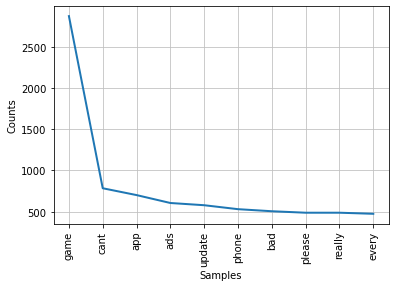

In [17]:
import matplotlib.pyplot as plt
fqdist.plot(10,cumulative=False)
plt.show()

### Distribusi Frekuensi jumlah huruf pada suatu data

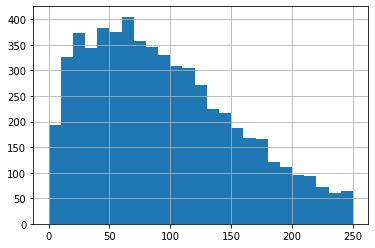

In [18]:
bin_range = np.arange(0, 260, 10)

df2['Review'].str.len().hist(bins=bin_range)
plt.show()

### Distribusi Frekuensi Jumlah kata per Data

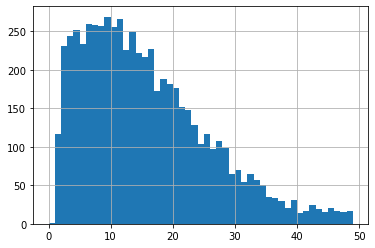

In [19]:
bin_range = np.arange(0, 50)
df2['Review'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()
 

### Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data

C:\Users\Fitrie Ratnasari\anaconda3\envs\py3.8\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Fitrie Ratnasari\anaconda3\envs\py3.8\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


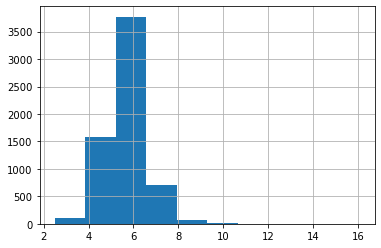

In [20]:
df2['Review'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

### Distribusi N-Gram

In [21]:
import nltk
result = pd.Series(nltk.ngrams(kata_tanpa_stopwords, 2)).value_counts()[:25]
result

(please, fix)         158
(love, game)          117
(playing, game)        82
(game, game)           76
(fun, game)            74
(game, fun)            59
(new, update)          51
(last, update)         51
(dont, waste)          45
(every, single)        44
(worst, ever)          43
(bad, bad)             42
(give, stars)          42
(spend, money)         39
(game, ever)           39
(full, review)         36
(fix, problem)         35
(takes, long)          35
(really, game)         35
(game, cant)           34
(really, annoying)     34
(game, really)         33
(stopped, working)     32
(hate, game)           31
(new, phone)           31
dtype: int64

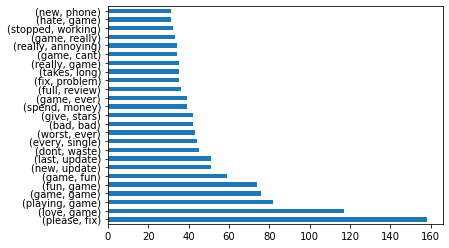

In [22]:
import matplotlib.pyplot as plt
result.plot(kind='barh')
plt.show()

In [23]:
### Disatukan kembali 

In [24]:
fin_text = ' '.join(kata_tanpa_stopwords)
fin_text

'prices nothing price waste waste application never work android tablet could enter scores per hole show give yardage hole graphics dont waste money app cant delete wish factory waste space phone useful learn language junk useful space waster useful need default share pictures useful waste people singing english garbage dont waste refuses work tried multiple times third class nd waste going well cant stand adds block menu icons profilechats furrs exstrait needs addressed makes harder waste needs internet n ask calls information faltu plz waste ur dont waste money become vip tons scam rubbish cant chat girls without paying premium waste awesommmmmmmmmm app jst dwnld nd njy nt trapped anywhr pakka waste waste phone memory map visible air traffic showing ever adds waste never downloaded adds never canada maybe guys state front waste garbage waste third grade waste timepaid girls waste waste buffer wain minutes another screen theres point playing keeps happening waste garbage stry let regi

## WordCloud

In [26]:
# import package 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
print ('Wordcloud is installed and imported!')


Wordcloud is installed and imported!


In [27]:
list_stopwords = stopwords.words('english')

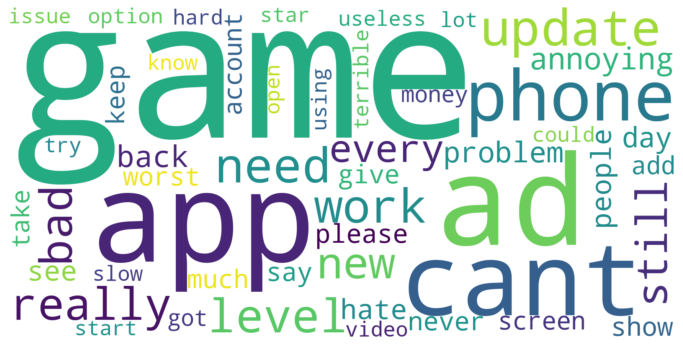

In [28]:
wc = WordCloud(width=1600, height=800, background_color="white", max_words=50, stopwords=list_stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(fin_text)

# show
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.title('Keyword for Negative Sentiment \n', fontsize= 20)
plt.show()